In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data from Github

In [3]:
def str_to_float(s):
    try:
        # Parse strings with decimal (,) separators
        return float(s.replace(',','.')) if type(s) == str else s
    except ValueError:
        return None

def str_to_date(s):
    try:
        # Parse dates
        return datetime.strptime(s,'%Y-%m-%d') if type(s) == str else s
    except ValueError:
        return None

In [4]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_data_df = pd.read_csv(
    url,
    converters={'total_deaths_per_million': str_to_float,
                'date': str_to_date
               },
    low_memory=False
)

## Select countries

In [5]:
countries = [
'Finland',
'France',
'Germany',
'Italy',
'Portugal',
'Spain',
'Sweden',
'Switzerland',
'United Kingdom'
]

countries = [
'Finland',
'France',
'Portugal',
'Spain',
'Sweden',
'United Kingdom'
]

covid_data_df = covid_data_df[covid_data_df['location'].isin(countries)]

In [6]:
def plot_serie(column_name, data_frame):
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)

    for key, grp in data_frame.groupby(['location']): 
        plt.plot(grp['date'], grp[column_name], label = key)

    plt.ylabel(column_name, fontsize=18)
    plt.xlabel('Date', fontsize=16)
    plt.legend(loc="upper left")
    plt.show()

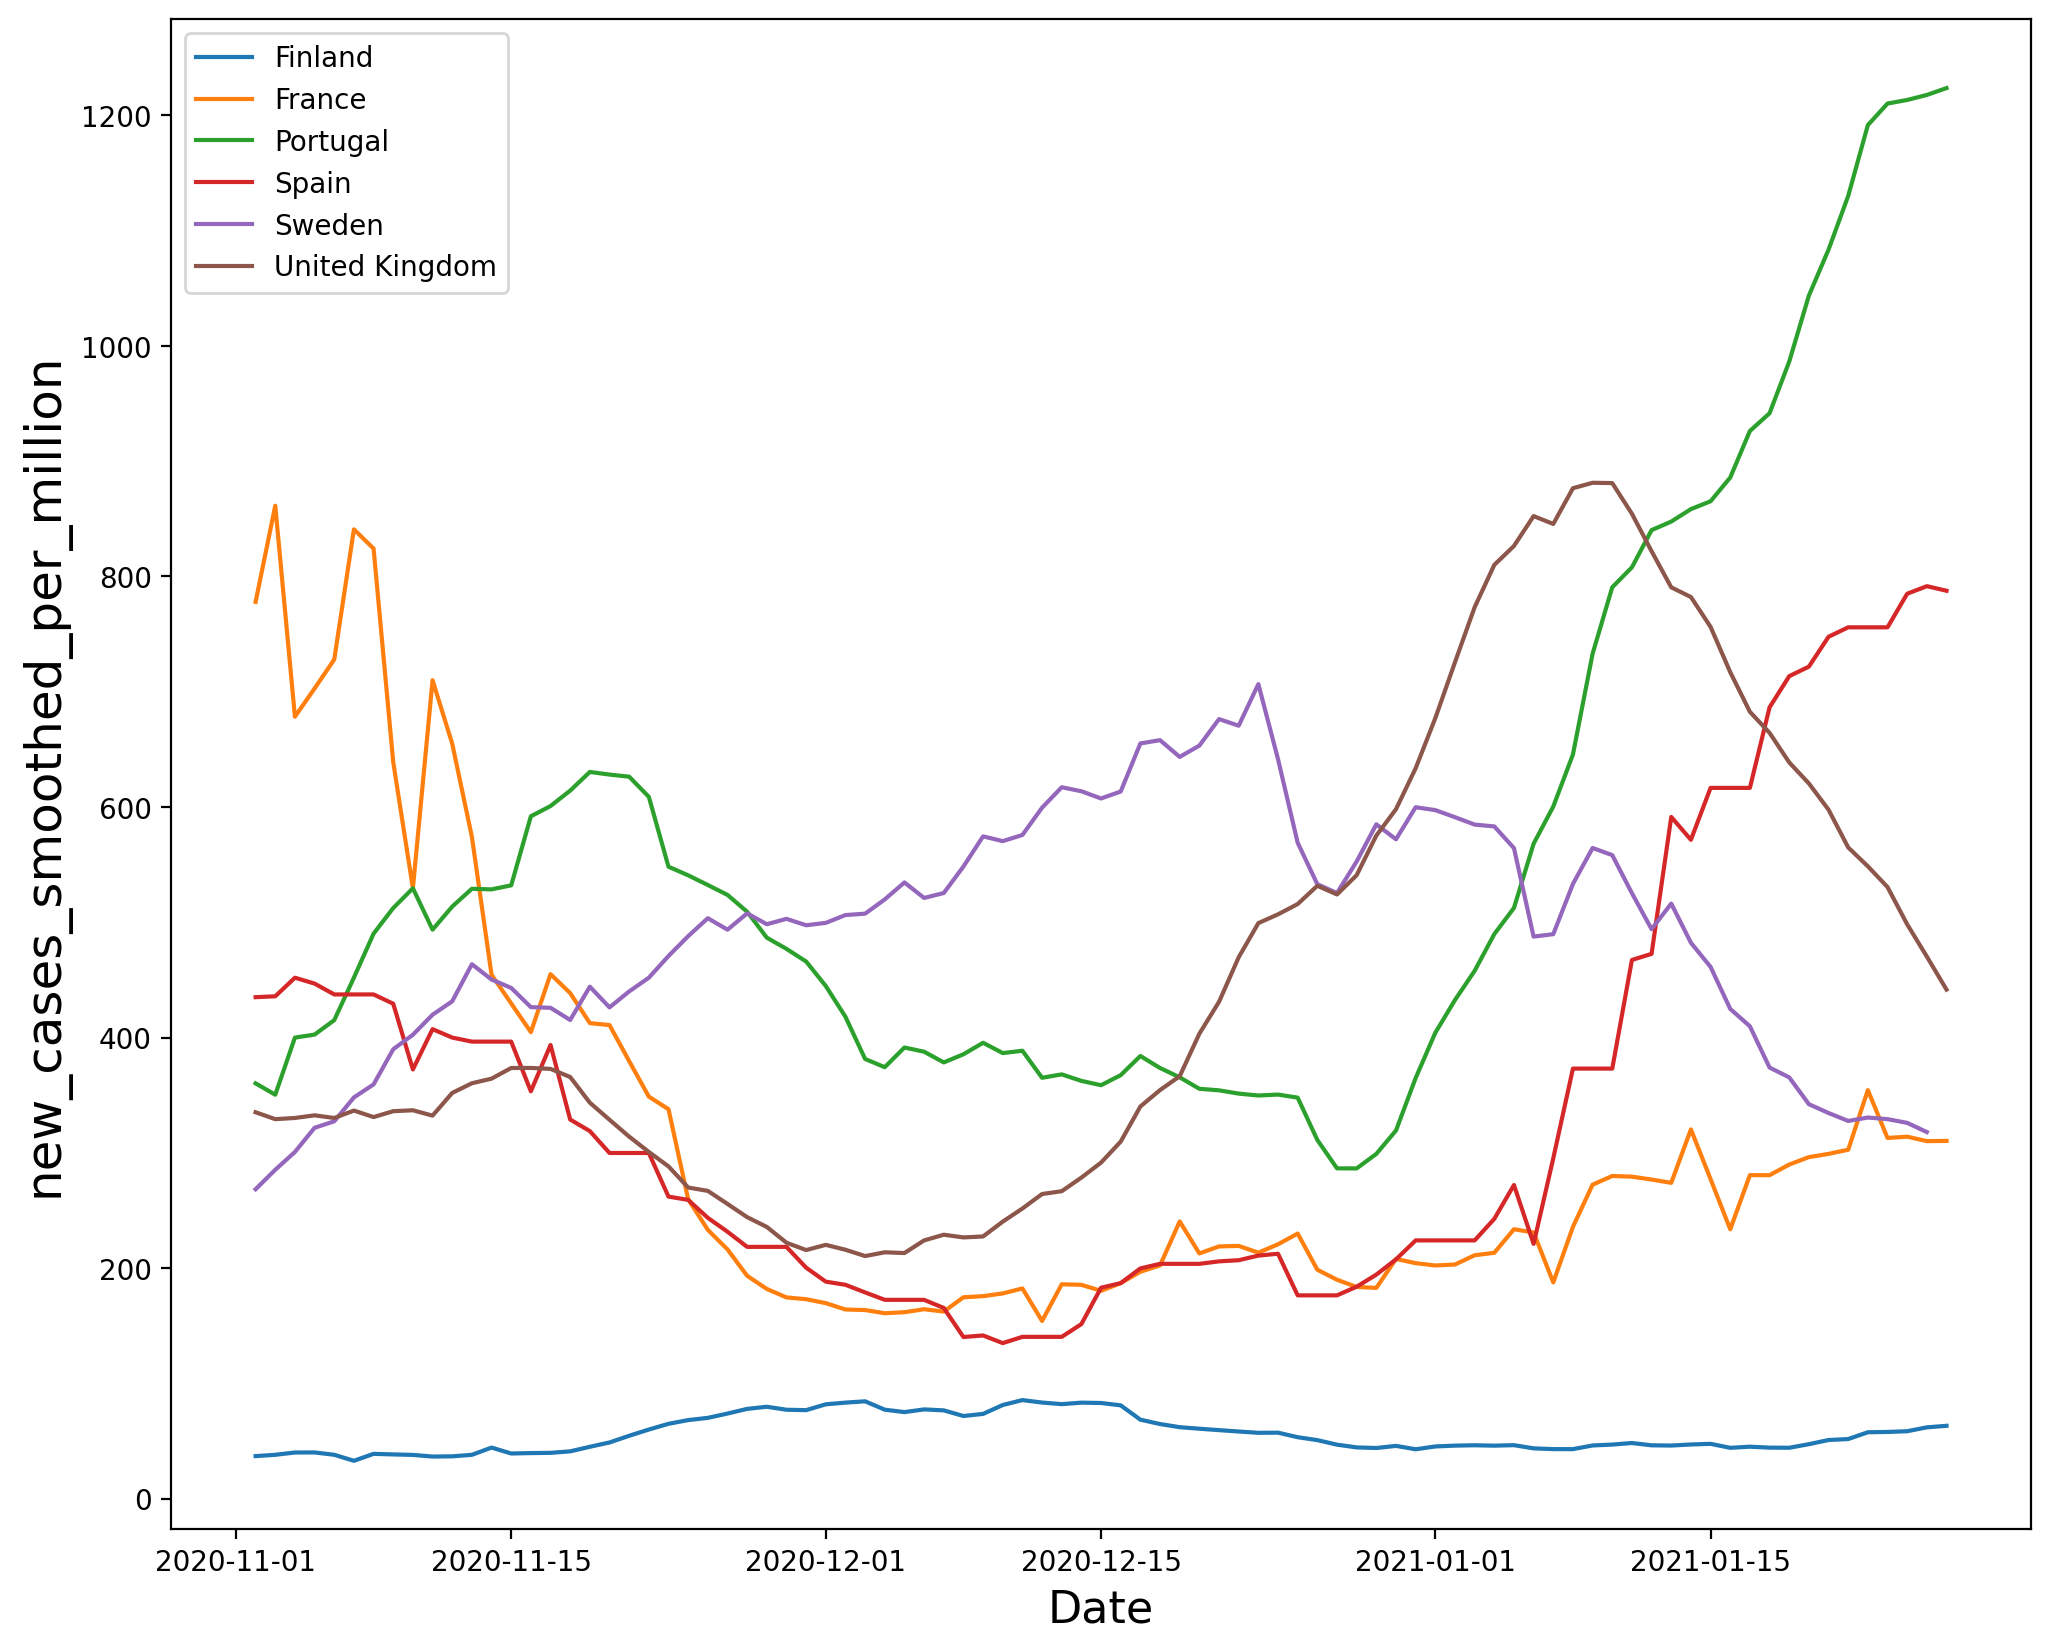

In [31]:
column_name = 'new_cases_smoothed_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > '2020-11-01')]
plot_serie(column_name, data_frame)

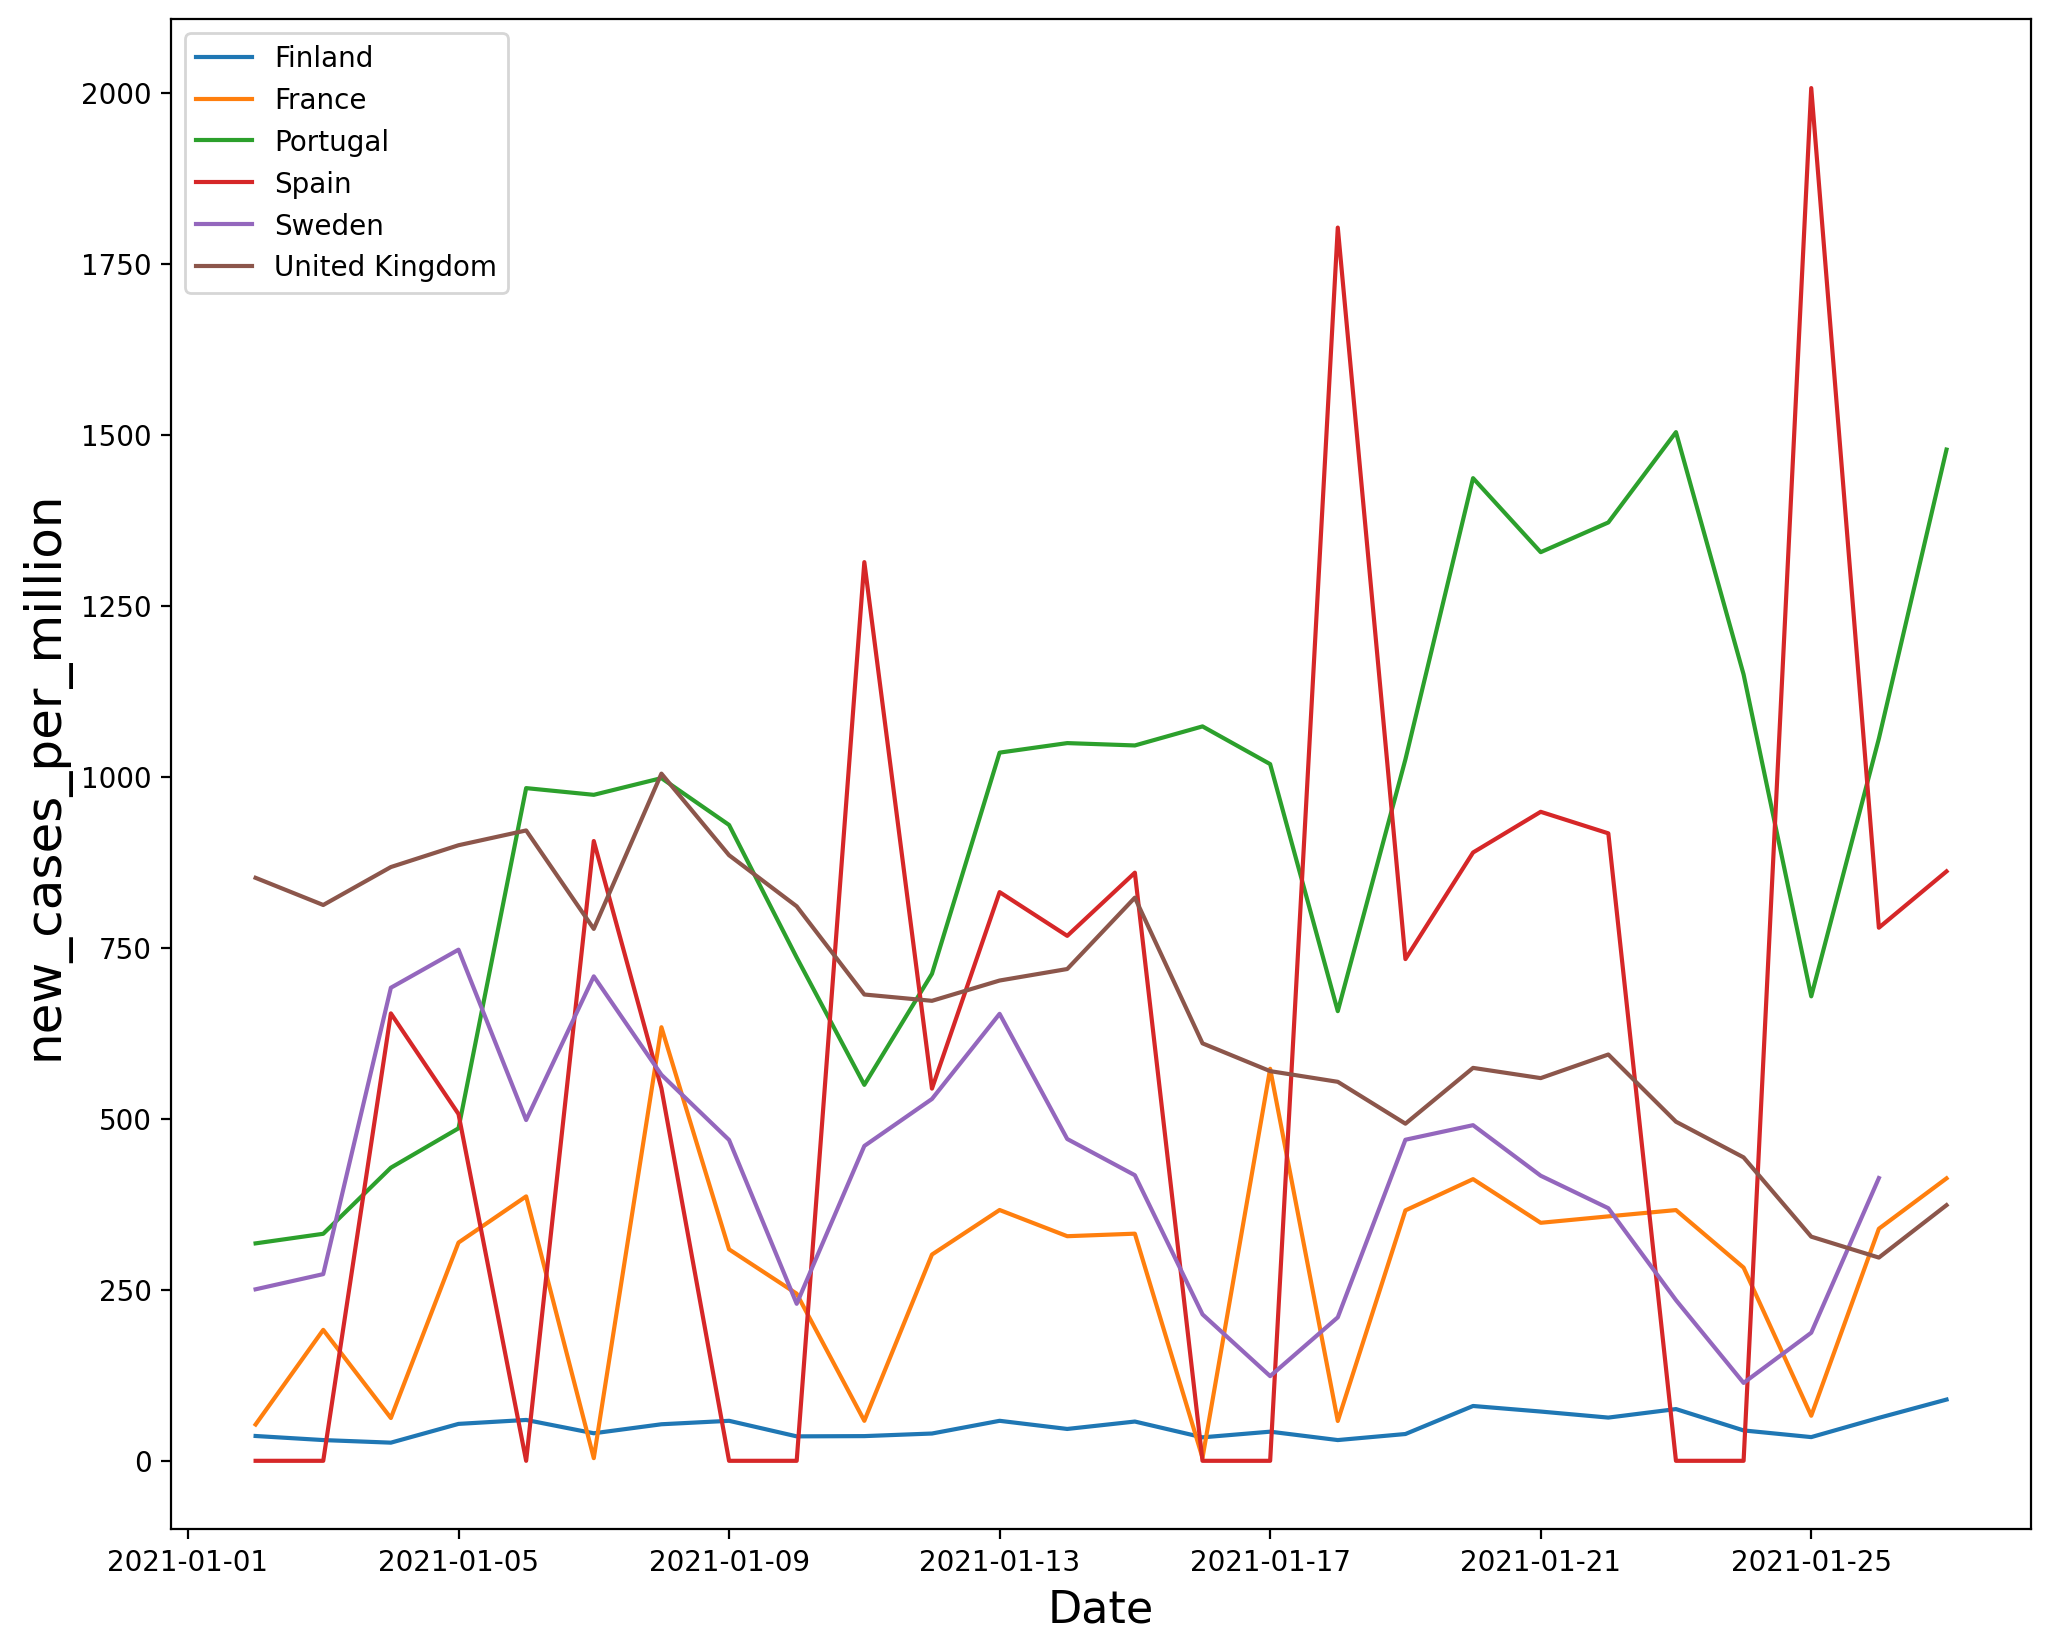

In [30]:
column_name = 'new_cases_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > '2021-01-01')]
plot_serie(column_name, data_frame)

In [27]:
covid_data_df_sorted = data_frame.sort_values(by='date', ascending=False).head(10)
covid_data_df_sorted

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
45285,PRT,Europe,Portugal,2021-01-27,668951.0,15073.0,12478.000,11305.0,293.0,262.857,...,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847
19863,FIN,Europe,Finland,2021-01-27,43616.0,496.0,350.000,660.0,5.0,4.000,...,40585.721,NaN,153.507,5.76,18.3,22.6,NaN,3.28,81.91,0.920
52794,ESP,Europe,Spain,2021-01-27,2670102.0,40285.0,36826.286,57291.0,497.0,379.143,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
20233,FRA,Europe,France,2021-01-27,3165449.0,26951.0,20255.429,74600.0,350.0,401.143,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
59189,GBR,Europe,United Kingdom,2021-01-27,3725637.0,25369.0,29977.286,102085.0,1726.0,1230.857,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
59188,GBR,Europe,United Kingdom,2021-01-26,3700268.0,20167.0,31923.429,100359.0,1636.0,1245.143,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
54161,SWE,Europe,Sweden,2021-01-26,560472.0,4174.0,3211.429,11391.0,0.0,18.571,...,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.80,0.933
19862,FIN,Europe,Finland,2021-01-26,43120.0,348.0,342.571,655.0,0.0,4.857,...,40585.721,NaN,153.507,5.76,18.3,22.6,NaN,3.28,81.91,0.920
52793,ESP,Europe,Spain,2021-01-26,2629817.0,36435.0,37010.714,56794.0,586.0,374.429,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
45284,PRT,Europe,Portugal,2021-01-26,653878.0,10765.0,12417.143,11012.0,291.0,252.286,...,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847
